# Vertical Shading 

## 1. Yearly Irradiance and Shading

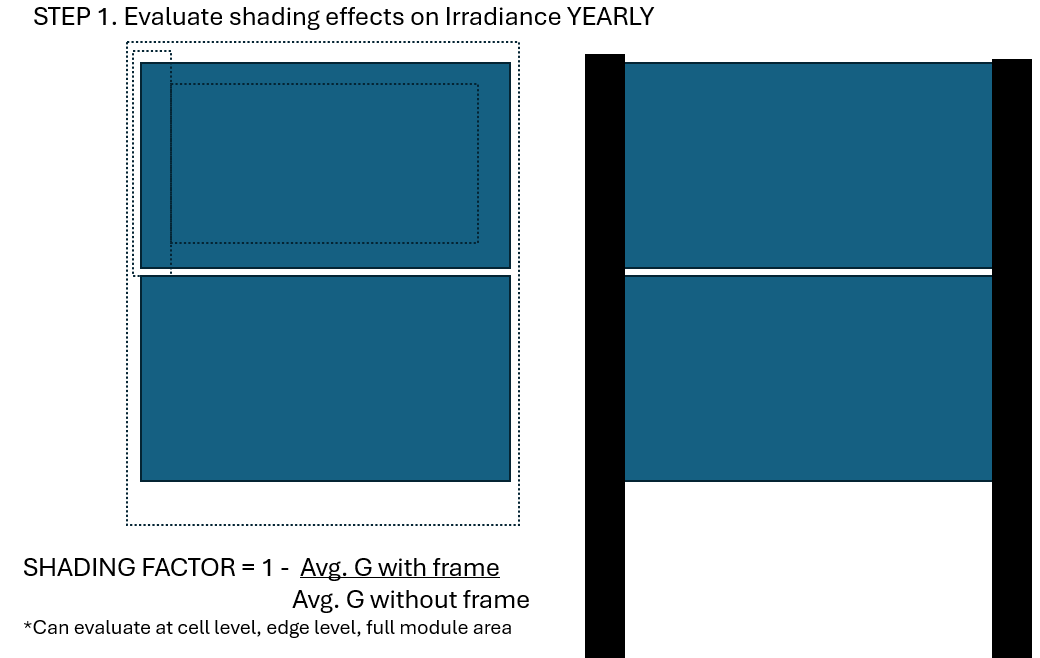

In [1]:
import os
from pathlib import Path

testfolder = str(Path().resolve().parent / 'TEMP' /  'August')

if not os.path.exists(testfolder):
    os.makedirs(testfolder)
    
print ("Your simulation will be stored in %s" % testfolder)

Your simulation will be stored in C:\Users\sayala\Documents\GitHub\bifacial_radiance\docs\TEMP\August


In [2]:
import bifacial_radiance as br
import numpy as np
import pandas as pd

In [3]:
# This information helps with debugging and getting support :)
import sys, platform
print("Working on a ", platform.system(), platform.release())
print("Python version ", sys.version)
print("Pandas version ", pd.__version__)
print("bifacial_radiance version ", br.__version__)

Working on a  Windows 10
Python version  3.11.4 | packaged by Anaconda, Inc. | (main, Jul  5 2023, 13:38:37) [MSC v.1916 64 bit (AMD64)]
Pandas version  2.1.0
bifacial_radiance version  0.4.2+236.g6801d3d.dirty


In [4]:
testopstelling = br.RadianceObj('x',str(testfolder))

testopstelling.setGround()
albedo = 0.35
testopstelling.setGround(albedo)

path = C:\Users\sayala\Documents\GitHub\bifacial_radiance\docs\TEMP\August

Input albedo 0-1, or string from ground.printGroundMaterials().
Alternatively, run setGround after readWeatherData()and setGround will read metdata.albedo if available
Loading albedo, 1 value(s), 0.350 avg
1 nonzero albedo values.


Make Module:

In [5]:
#2-up landscape
simpleModule = True

moduletype = 'test-module'

num_panels = 2
x = 2
y = 1

x_gap = 0.20
y_gap = 0.10
z_gap = 0

num_cells_x = 12
num_cells_y = 24
x_cell = 0.17283
y_cell = 0.08692
x_cell_gap = 0.002
y_cell_gap = 0.002

cellLevelModuleParams = {'numcellsx': num_cells_y, 'numcellsy': num_cells_x,
                         'xcell': y_cell, 'ycell': x_cell, 'xcellgap': y_cell_gap, 'ycellgap': x_cell_gap}


if simpleModule:
    module = testopstelling.makeModule(name=moduletype, x=x, y=y, numpanels=num_panels,
                                   xgap=x_gap, ygap=y_gap)
else:
    module = testopstelling.makeModule(name=moduletype, x=x, y=y, numpanels=num_panels,
                                   xgap=x_gap, ygap=y_gap, cellModule=cellLevelModuleParams)




Module Name: test-module
Module test-module updated in module.json
Pre-existing .rad file objects\test-module.rad will be overwritten



In [6]:
#epwfile = r'C:/Users/Gebruiker/Downloads/tmy_51.036_2.658_2005_2020 (1).epw'
epwfile = testopstelling.getEPW(lat=33,lon=-110)
metdata = testopstelling.readWeatherFile(epwfile)


Getting weather file: USA_AZ_Safford.AWOS.722747_TMY3.epw
 ... OK!
8760 line in WeatherFile. Assuming this is a standard hourly WeatherFile for the year for purposes of saving Gencumulativesky temporary weather files in EPW folder.
Coercing year to 2021
Saving file EPWs\metdata_temp.csv, # points: 8760
Calculating Sun position for Metdata that is right-labeled  with a delta of -30 mins. i.e. 12 is 11:30 sunpos


Scene parameters

In [8]:
pitch = 9  # m
hub_height = 1.75  # m  2.8m to top; -1 m for module, -0.5 xgap
nMods = 6  # six modules per row.
nRows = 3  # 3 row
azimuth_ang = 270  # Facing west
tilt = 90  # tilt.

sceneDict = {'tilt': tilt, 'pitch': pitch, 'hub_height': hub_height, 'azimuth': azimuth_ang, 'nMods': nMods,
             'nRows': nRows}

In [9]:
testopstelling.genCumSky() # entire year.

Loaded  EPWs\metdata_temp.csv
message: Error!  Solar altitude is -6 < -6 degrees and Idh = 11 > 10 W/m^2 on day 95 !Ibn is 0.  Attempting to continue!
There were 4215 sun up hours in this climate file
Total Ibh/Lbh: 0.000000


'skies\\cumulative.rad'

In [10]:
scene = testopstelling.makeScene(module=moduletype, sceneDict=sceneDict)

In [11]:
octfile = testopstelling.makeOct(testopstelling.getfilelist()) 

Created x.oct


In [12]:
analysis = br.AnalysisObj(octfile, testopstelling.basename)

### Without Frame evaluation

In [13]:
frontscan, backscan = analysis.moduleAnalysis(scene, modWanted = 4, rowWanted =2,  sensorsx=12, sensorsy=12)
results = analysis.analysis(octfile, testopstelling.basename+'baseline', frontscan, backscan)

Linescan in process: xbaseline_Row2_Module4_Front
Linescan in process: xbaseline_Row2_Module4_Back
Saved: results\irr_xbaseline_Row2_Module4.csv


({'Wm2': [1424685.0,
   1446194.0,
   1467704.0,
   1444083.0,
   1468692.0,
   1493300.0,
   1504480.0,
   1527188.0,
   1549896.0,
   1572603.0,
   1605932.0,
   1623777.0,
   1426030.0,
   1434062.0,
   1431835.0,
   1444003.0,
   1465303.0,
   1484822.0,
   1505442.0,
   1533436.0,
   1561945.0,
   1587505.0,
   1605350.0,
   1623195.0,
   1427375.0,
   1439861.0,
   1427504.0,
   1444116.0,
   1465189.0,
   1483868.0,
   1506404.0,
   1534946.0,
   1563054.0,
   1586923.0,
   1604768.0,
   1622614.0,
   1390445.0,
   1412268.0,
   1425566.0,
   1444132.0,
   1463692.0,
   1484658.0,
   1507366.0,
   1536344.0,
   1564955.0,
   1586342.0,
   1604187.0,
   1622032.0,
   1392478.0,
   1414301.0,
   1461002.0,
   1486428.0,
   1511854.0,
   1485620.0,
   1508327.0,
   1537988.0,
   1567915.0,
   1585760.0,
   1603605.0,
   1621451.0,
   1400222.0,
   1433532.0,
   1462399.0,
   1487826.0,
   1513252.0,
   1504988.0,
   1526999.0,
   1549203.0,
   1567333.0,
   1585179.0,
   1603024.0,

## WITH frame

In [15]:
torquetubelength = 14.036
postheight = 0.03
postwidth = 0.06

#horizontale palen
post_x = -2.25 #verschuift palen van links naar rechts, hoe negatiever hoe meer naar links
z_step = 1.09 #verhoogt de palen
y_step = 9 #bepaald de afstand tussen de verschillende rijen

y = 9.1

for i in range(3):
    post_z = 2.84
    for j in range(3):
        name = 'Post{}{}'.format(i, j)
        text = '! genbox Metal_Aluminum_Anodized torquetube_row2 {} {} {} | xform -t {} -0.2 0.15 | xform -t {} {} {} ' \
               '| ' \
               'xform -rz 90'.format(
            torquetubelength, postheight, postwidth, (-torquetubelength + module.sceney) / 2.0, post_x, y, post_z)
        customObject = testopstelling.makeCustomObject(name, text)
        testopstelling.appendtoScene(radfile=scene.radfiles, customObject=customObject)
        post_z -= z_step

    y -= y_step
pileheight = 3.05
pilewidth = 0.17
piledepth = 0.08


Custom Object Name objects\Post00.rad

Custom Object Name objects\Post01.rad

Custom Object Name objects\Post02.rad

Custom Object Name objects\Post10.rad

Custom Object Name objects\Post11.rad

Custom Object Name objects\Post12.rad

Custom Object Name objects\Post20.rad

Custom Object Name objects\Post21.rad

Custom Object Name objects\Post22.rad


In [16]:
#nulpunt paal
x_value = 0
y_value = 0
name_string = 'pileZERO'
text = ('! genbox Metal_Grey pile{}row{} ' + '{} {} {} '.format(0.1, 0.1, 10)
        + '| xform -t {} {} {}'.format(x_value, y_value, 0))
customObject = testopstelling.makeCustomObject(name_string, text)
testopstelling.appendtoScene(scene.radfiles, customObject)

#verticale palen
x_offset = - 0.1
y_step = 2.15

x_value = -9.1
for i in range(3):
    y_value = -8.23
    for j in range(7):
        name_string = 'pile{}{}'.format(i, j)
        text = ('! genbox Metal_Grey pile{}row{} '.format(i, j) + '{} {} {} '.format(pilewidth, piledepth, pileheight)
                + '| xform -t {} {} {}'.format(x_value, y_value, 0))
        customObject = testopstelling.makeCustomObject(name_string, text)
        testopstelling.appendtoScene(scene.radfiles, customObject)
        y_value += 2.331

    x_value += 9



Custom Object Name objects\pileZERO.rad

Custom Object Name objects\pile00.rad

Custom Object Name objects\pile01.rad

Custom Object Name objects\pile02.rad

Custom Object Name objects\pile03.rad

Custom Object Name objects\pile04.rad

Custom Object Name objects\pile05.rad

Custom Object Name objects\pile06.rad

Custom Object Name objects\pile10.rad

Custom Object Name objects\pile11.rad

Custom Object Name objects\pile12.rad

Custom Object Name objects\pile13.rad

Custom Object Name objects\pile14.rad

Custom Object Name objects\pile15.rad

Custom Object Name objects\pile16.rad

Custom Object Name objects\pile20.rad

Custom Object Name objects\pile21.rad

Custom Object Name objects\pile22.rad

Custom Object Name objects\pile23.rad

Custom Object Name objects\pile24.rad

Custom Object Name objects\pile25.rad

Custom Object Name objects\pile26.rad


#### Append grass material

In [ ]:
# Try to run only once or it keeps adding it to the file every run
#testopstelling.addMaterial('grass', Rrefl=.0, Grefl=.170, Brefl=.0)

In [17]:
name='gras_ondergrond'
carpositionx=-2
carpositiony=-1
text='! genbox grass CenterPatch 18 25 0.1 | xform -t -10 -13 0'.format(carpositionx, carpositiony)
customObject = testopstelling.makeCustomObject(name,text)
testopstelling.appendtoScene(scene.radfiles, customObject)


Custom Object Name objects\gras_ondergrond.rad


#### Sanity check

In [18]:
#testopstelling.scene.showScene()

Rendering scene. This may take a moment...


Another way to view, but you NEED to have a single hour sun, and an updated octfile

In [ ]:
#testopstelling.gendaylit1axis(4000)

In [ ]:
#testopstelling.makeOct()

In [ ]:
#!rvu -vf views\front.vp -e .01 -pe 0.02 -vp -2 -12 14.5 x.oct

In [19]:
octfile = testopstelling.makeOct(testopstelling.getfilelist()) 

Created x.oct


In [21]:
frontscan, backscan = analysis.moduleAnalysis(scene, modWanted = 4, rowWanted =2,  sensorsx=12, sensorsy=12)
analysis.analysis(octfile, testopstelling.basename, frontscan, backscan)

Linescan in process: x_Row2_Module4_Front
Linescan in process: x_Row2_Module4_Back
Saved: results\irr_x_Row2_Module4.csv


({'Wm2': [1195255.3333333333,
   1215843.3333333333,
   1248228.6666666667,
   1276733.3333333333,
   1296102.6666666667,
   1330283.0,
   1350262.0,
   1379119.0,
   1397073.6666666667,
   1411250.6666666667,
   1444171.0,
   1475669.3333333333,
   1148929.3333333333,
   1173230.3333333333,
   1217874.3333333333,
   1243390.0,
   1247352.0,
   1273513.0,
   1291171.6666666667,
   1317347.0,
   1343522.3333333333,
   1365423.0,
   1392374.6666666667,
   1419326.3333333333,
   1152113.6666666667,
   1188065.3333333333,
   1220042.6666666667,
   1229677.0,
   1248809.0,
   1269153.6666666667,
   1293330.3333333333,
   1318802.0,
   1341854.0,
   1368805.6666666667,
   1395757.3333333333,
   1409198.6666666667,
   1168363.3333333333,
   1192938.3333333333,
   1217513.0,
   1262850.0,
   1289796.6666666667,
   1316744.0,
   1343690.6666666667,
   1327977.6666666667,
   1353815.0,
   1375129.6666666667,
   1389701.3333333333,
   1410449.3333333333,
   1169771.0,
   1200531.0,
   1233357.333

## 2. Hourly Irradiance (1-axis method)

Rerunning weatherfile to do only 1 day 

In [27]:
metdata = testopstelling.readWeatherFile(epwfile, coerce_year=2021, starttime='2021-06-01', endtime='2021-06-01')

8760 line in WeatherFile. Assuming this is a standard hourly WeatherFile for the year for purposes of saving Gencumulativesky temporary weather files in EPW folder.
Coercing year to 2021
Filtering dates
Saving file EPWs\metdata_temp.csv, # points: 8760
Calculating Sun position for Metdata that is right-labeled  with a delta of -30 mins. i.e. 12 is 11:30 sunpos


In [22]:
# -- establish tracking angles
fixed_tilt_angle = 90 # Vertical
cumulativesky = False # Want to do hourly simulations

trackerParams = {
             'cumulativesky':cumulativesky,
             'azimuth': azimuth_ang,
             'fixed_tilt_angle': fixed_tilt_angle
             }

In [28]:
trackerdict = testopstelling.set1axis(**trackerParams)

In [29]:
trackerdict = testopstelling.makeScene1axis(module=moduletype,sceneDict=sceneDict)



Making ~14 .rad files for gendaylit 1-axis workflow (this takes a minute..)
14 Radfiles created in /objects/


In [32]:
trackerdict = testopstelling.gendaylit1axis()

Creating ~14 skyfiles. 
Created 14 skyfiles in /skies/


In [33]:
trackerdict = testopstelling.makeOct1axis()


Making 14 octfiles in root directory.
Created 1axis_2021-06-01_0600.oct
Created 1axis_2021-06-01_0700.oct
Created 1axis_2021-06-01_0800.oct
Created 1axis_2021-06-01_0900.oct
Created 1axis_2021-06-01_1000.oct
Created 1axis_2021-06-01_1100.oct
Created 1axis_2021-06-01_1200.oct
Created 1axis_2021-06-01_1300.oct
Created 1axis_2021-06-01_1400.oct
Created 1axis_2021-06-01_1500.oct
Created 1axis_2021-06-01_1600.oct
Created 1axis_2021-06-01_1700.oct
Created 1axis_2021-06-01_1800.oct
Created 1axis_2021-06-01_1900.oct


### Hourly baseline without racking

In [ ]:
trackerdict = demo.analysis1axis(customname = 'Baseline', sensorsy=2, sensorsx=2)

# @Chris: How to append the objects here like in the fixed tilt routine above. Thanks.

In [ ]:
# ADD GEOMETRY HERE

In [ ]:
#redo Oct with the new geometry
trackerdict = testopstelling.makeOct1axis()

In [ ]:
trackerdict = demo.analysis1axis(sensorsy=2, sensorsx=2)